In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import natsort
import _pickle
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# dataset_dir = "D:/Databases/CAS(ME)^2"
# dataset_dir = "I:/HEH/Databases/CAS(ME)^2"
# dataset_dir = "/data/disk1/heh/databases/CAS(ME)^2"

dataset_dir = "D:/Databases/SAMM_longvideos"
# dataset_dir = "I:/HEH/Databases/SAMM_longvideos"
# dataset_dir = "/data/disk1/heh/databases/SAMM_longvideos"

images_loading = False
image_size = 128
expression_type = "micro-expression"
# expression_type = "macro-expression"
save_x = False


In [8]:
videos = []
videos_code = []
for subject_video in natsort.natsorted(Path(dataset_dir).glob("SAMM_longvideos/*")):
    print(subject_video.name, end="\r")
    images = []
    for image in subject_video.iterdir():
        images.append(image)
    videos.append(images)
    videos_code.append(subject_video.name)

print()
for video, code in zip(videos, videos_code):
    if len(video) > 10000:
        print(f"{code} len: {len(video)}")


037_7
016_7 len: 11770


## Cropping Debugging


dlib height = 223, weight = 223
cv2 dnn height = 317, weight = 216


Text(0.5, 1.0, 'cv2 face')

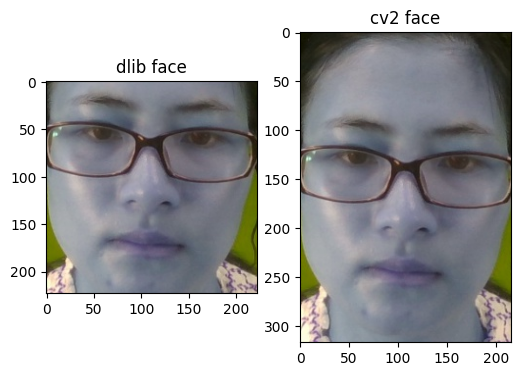

In [5]:
# image_path = (
#     "D:/Databases/CAS(ME)^2/rawpic/s27/27_0101disgustingteeth/img001.jpg"
# )
# image_path = "D:/Databases/SAMM_longvideos/SAMM_longvideos/006_1/006_1_0001.jpg"
image_path = "D:/Databases/MEGC2022_testSet/CAS_Test_cropped/sub01/0001.jpg"
image = cv2.imread(image_path)

face_detector = dlib.get_frontal_face_detector()
detected_faces = face_detector(image, 1)
for face_rect in detected_faces:
    face_top = face_rect.top()
    face_bottom = face_rect.bottom()
    face_left = face_rect.left()
    face_right = face_rect.right()
print(f"dlib height = {face_bottom-face_top}, weight = {face_right-face_left}")
dlib_face = image[face_top:face_bottom, face_left:face_right]

modelFile = "./__utils__/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "./__utils__/deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
# use DNN Face Detector in OpenCV
frameHeight, frameWidth, _ = image.shape
conf_threshold = 0.5
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * frameWidth)
        y1 = int(detections[0, 0, i, 4] * frameHeight)
        x2 = int(detections[0, 0, i, 5] * frameWidth)
        y2 = int(detections[0, 0, i, 6] * frameHeight)
print(f"cv2 dnn height = {y2-y1}, weight = {x2-x1}")
cv2_face = image[y1:y2, x1:x2]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(dlib_face.astype("uint8"))
plt.title("dlib face")
plt.subplot(1, 2, 2)
plt.imshow(cv2_face.astype("uint8"))
plt.title("cv2 face")


## Load Images 


### CAS(ME)^2


When debug the image processing, the videos_images is from cropped_rawpic, whereas the other variables are from rawpic.


In [5]:
from image_processing import *

# videos_images, subjects, subjects_videos_code = load_images(dataset_dir)
videos_images, subjects, subjects_videos_code = load_images_dev(
    dataset_dir, images_loading=images_loading, image_size=image_size
)


subject:  s15
subject:  s16
subject:  s19
subject:  s20
subject:  s21
subject:  s22
subject:  s23
subject:  s24
subject:  s25
subject:  s26
subject:  s27
subject:  s29
subject:  s30
subject:  s31
subject:  s32
subject:  s33
subject:  s34
subject:  s35
subject:  s36
subject:  s37
subject:  s38
subject:  s40


In [6]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)


subjects: ['s15', 's16', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's40']
subjects_videos_code: [['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0508'], ['0101', '0102', '0401', '0402', '0502', '0505', '0507'], ['0102', '0402', '0505', '0507', '0502'], ['0502'], ['0101', '0401'], ['0101', '0102', '0402', '0503', '0508'], ['0102', '0402', '0503', '0507'], ['0101', '0401', '0402', '0502', '0507'], ['0101', '0102', '0502', '0508'], ['0101', '0102', '0401', '0503'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0502'], ['0101', '0102', '0401', '0502', '0503', '0505', '0507'], ['0101', '0401', '0402', '0502', '0503', '0505', '0507'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0102', '0402'], ['0401', '0402', '0503'], ['0102'], ['0401', '0505'], ['0101', '0402', '0502', '0505', '0507', '0508'], ['0502', '0507'], ['0401', '0502', '

## load Excel


In [7]:
from label_processing import load_excel

Excel_data = load_excel(dataset_dir)


In [8]:
Excel_data.head(5)


,participant,video_name_&_expression_number,onset,apex,offset,AUs,extimated_emotion,expression_type,self-reported_emotion,video_name,video_code,subject
0,1,anger1_1,557,572,608,4+10+14+15,negative,macro-expression,anger,anger1,0401,s15
1,1,anger1_2,2854,2862,2871,38,others,macro-expression,sadness,anger1,0401,s15
2,1,anger2_1,2155,2163,0,NaN,negative,macro-expression,anger,anger2,0402,s15
3,1,anger2_2,3363,3371,3383,4+7+14,negative,macro-expression,anger,anger2,0402,s15
4,1,anger2_3,3380,3386,3407,4+14+38,negative,macro-expression,anger,anger2,0402,s15


## Load Ground Truth Labels


### CAS(ME)^2


In [10]:
from label_processing import load_ground_truth_labels


(
    clean_videos_images,
    clean_subjects_videos_code,
    clean_subjects,
    clean_subjects_videos_ground_truth_labels,
) = load_ground_truth_labels(
    dataset_dir,
    expression_type,
    videos_images,
    subjects_videos_code,
    subjects,
    Excel_data,
)


required_videos_index:  [1, 4, 8, 9, 12, 13, 14, 16, 28, 33, 36, 37, 38, 45, 46, 47, 49, 50, 52, 54, 55, 57, 62, 64, 67, 71, 73, 74, 77, 83, 87, 91, 93]
len(clean_videos_images) = 33


In [11]:
print("len(clean_subjects): ", len(clean_subjects))
print("clean_subjects: ", clean_subjects)
print("len(clean_subjects_videos_code): ", len(clean_subjects_videos_code))
print("clean_subjects_videos_codes: ", clean_subjects_videos_code)
print(
    "len(clean_subjects_videos_ground_truth_labels): ",
    len(clean_subjects_videos_ground_truth_labels),
)
print(
    "clean_subjects_videos_ground_truth_labels: ",
    clean_subjects_videos_ground_truth_labels,
)


len(clean_subjects):  14
clean_subjects:  ['s15' 's16' 's19' 's23' 's24' 's25' 's27' 's29' 's30' 's31' 's32' 's35'
 's37' 's38']
len(clean_subjects_videos_code):  14
clean_subjects_videos_codes:  [['0102', '0502'], ['0101', '0102', '0502', '0505', '0507'], ['0402'], ['0102'], ['0401', '0507'], ['0101', '0102'], ['0101', '0102', '0401', '0502', '0503', '0507'], ['0502'], ['0101', '0401'], ['0101', '0402', '0505'], ['0401', '0502', '0503', '0508'], ['0102'], ['0402', '0508'], ['0507']]
len(clean_subjects_videos_ground_truth_labels):  14
clean_subjects_videos_ground_truth_labels:  [[[[698, 706]], [[137, 147]]], [[[551, 564]], [[269, 277]], [[322, 333]], [[395, 406], [1694, 1709], [1879, 1894]], [[1957, 1967], [2284, 2294]]], [[[1926, 1941]]], [[[330, 345], [525, 539], [726, 739]]], [[[607, 620], [962, 976], [1889, 1901], [2180, 2192], [3440, 3452]], [[1835, 1847], [1950, 1964], [3232, 3247]]], [[[112, 126]], [[995, 1007], [1007, 1016], [1017, 1033]]], [[[873, 887]], [[33, 47], [308, 316],

## Calculate k


### CAS(ME)^2


In [12]:
from label_processing import calculate_k

k = calculate_k(clean_subjects_videos_ground_truth_labels)


k (Half of average length of expression) =  6


## Extract Features


## Debug Preprocess


In [10]:
image = cv2.imread(
    "D:/Databases/CAS(ME)^2/cropped_rawpic/s15/15_0101disgustingteeth/img001.jpg"
)

predictor_model = "./__utils__/shape_predictor_68_face_landmarks.dat"
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
resampled_clean_videos_images_features = []

reference_img = image
detect = face_detector(reference_img, 2)
index_shift = 0
shape = face_pose_predictor(reference_img, detect[0])

# Left Eye
x11 = max(shape.part(36).x - 15, 0)
y11 = shape.part(36).y
x12 = shape.part(37).x
y12 = max(shape.part(37).y - 15, 0)
x13 = shape.part(38).x
y13 = max(shape.part(38).y - 15, 0)
x14 = min(shape.part(39).x + 15, 256)
y14 = shape.part(39).y
x15 = shape.part(40).x
y15 = min(shape.part(40).y + 15, 256)
x16 = shape.part(41).x
y16 = min(shape.part(41).y + 15, 256)

# Right Eye
x21 = max(shape.part(42).x - 15, 0)
y21 = shape.part(42).y
x22 = shape.part(43).x
y22 = max(shape.part(43).y - 15, 0)
x23 = shape.part(44).x
y23 = max(shape.part(44).y - 15, 0)
x24 = min(shape.part(45).x + 15, 256)
y24 = shape.part(45).y
x25 = shape.part(46).x
y25 = min(shape.part(46).y + 15, 256)
x26 = shape.part(47).x
y26 = min(shape.part(47).y + 15, 256)

# ROI 1 (Left Eyebrow)
x31 = max(shape.part(17).x - 12, 0)
y32 = max(shape.part(19).y - 12, 0)
x33 = min(shape.part(21).x + 12, 256)
y34 = min(shape.part(41).y + 12, 256)

# ROI 2 (Right Eyebrow)
x41 = max(shape.part(22).x - 12, 0)
y42 = max(shape.part(24).y - 12, 0)
x43 = min(shape.part(26).x + 12, 256)
y44 = min(shape.part(46).y + 12, 256)

# ROI 3 #Mouth
x51 = max(shape.part(60).x - 12, 0)
y52 = max(shape.part(50).y - 12, 0)
x53 = min(shape.part(64).x + 12, 256)
y54 = min(shape.part(57).y + 12, 256)

# Nose landmark
x61 = shape.part(28).x
y61 = shape.part(28).y


# Eye masking
left_eye = [
    (x11, y11),
    (x12, y12),
    (x13, y13),
    (x14, y14),
    (x15, y15),
    (x16, y16),
]
right_eye = [
    (x21, y21),
    (x22, y22),
    (x23, y23),
    (x24, y24),
    (x25, y25),
    (x26, y26),
]

# ROI Selection -> Image resampling into 42x22x3
# upper ROI
print(f"upper ROI height = {max(y34, y44) - min(y32, y42)}, weight = {x43 - x31}")
# lower ROI
print(f"lower ROI height = {y54 - y52}, height = {x53 - x51}")


upper ROI height = 68, weight = 231
lower ROI height = 54, height = 90


In [135]:
print(
    "len(resampled_clean_videos_images_features): ",
    len(resampled_clean_videos_images_features),
)
print(
    "len(resampled_clean_videos_images_features[0]): ",
    len(resampled_clean_videos_images_features[0]),
)
print(
    "resampled_clean_videos_images_features[0][0].shape: ",
    resampled_clean_videos_images_features[0][0].shape,
)


len(resampled_clean_videos_images_features):  1
len(resampled_clean_videos_images_features[0]):  1069
resampled_clean_videos_images_features[0][0].shape:  (42, 42, 3)


## Pseudo Labeling


In [ ]:
a = np.array([2, 3, 4])
b = 3
c = np.intersect1d(a, b)
print(len(c))


## Prepare for LOSO


## Debug Evaluation


In [3]:
import sys

epsilon = sys.float_info.epsilon

scenarios = {
    0: {
        "dataset": "CAS(ME)^2",
        "expression_type": "me",
        "num_expression": 57,
    },
    1: {
        "dataset": "CAS(ME)^2",
        "expression_type": "mae",
        "num_expression": 298,
    },
}

scenario = scenarios[1]
true_positive = 70
false_positive = 268
false_negative = scenario["num_expression"] - true_positive
print(
    f"True Positive: {true_positive} False Posive: {false_positive} False Negative: {false_negative}"
)
# add epsilon to avoid float division by zero
precision = true_positive / (true_positive + false_positive) + epsilon
recall = true_positive / (true_positive + false_negative) + epsilon
F1_score = (2 * precision * recall) / (precision + recall) + epsilon
print(f"Precision = {precision}, Recall ={recall}, F1-Score = {F1_score}")


True Positive: 70 False Posive: 268 False Negative: 228
Precision = 0.20710059171597656, Recall =0.23489932885906062, F1-Score = 0.22012578616352244


## Ablation Study


In [18]:
with open(
    Path(
        dataset_dir,
        "preds",
        "me_sl_swin_preds_epoch_25_batch_size_32_128.pkl",
    ),
    "rb",
) as pkl_file:
    me_preds = _pickle.load(pkl_file)
    pkl_file.close()


In [20]:
from mean_average_precision.mean_average_precision import MeanAveragePrecision2d
from spotting import *
from evaluation import *

reconstructed_clean_videos_ground_truth_labels_len = 0
p = 0.55  # From our analysis, 0.55 achieved the highest F1-Score
show_plot_or_not = False
metric_fn = MeanAveragePrecision2d(num_classes=1)
matrix = {"precision": [], "recall": [], "F1-score": [], "expression_count": 0}

for split, pred in enumerate(me_preds):
    print(f"Split {split} is in process.")
    # spotting
    reconstructed_clean_videos_ground_truth_labels_len, metric_fn = spot(
        pred,
        reconstructed_clean_videos_ground_truth_labels_len,
        clean_subjects_videos_ground_truth_labels,
        split,
        clean_videos_images,
        clean_subjects,
        clean_subjects_videos_code,
        k,
        metric_fn,
        p,
        find_peaks_distance=k,
        show_plot_or_not=show_plot_or_not,
    )

    # evaluation
    # every evaluation considers all splitted videos
    precision, recall, F1_score = evaluate(
        reconstructed_clean_videos_ground_truth_labels_len,
        metric_fn,
    )

    matrix["precision"].append(precision)
    matrix["recall"].append(recall)
    matrix["F1-score"].append(F1_score)
    matrix["expression_count"] = reconstructed_clean_videos_ground_truth_labels_len

    print(f"Split {split} is processed.\n")


Split 0 is in process.
0 video(s) have been processed.
The current video be processed: subject s15, video 0102
The current video be processed: subject s15, video 0502

True Positive: 0 False Posive: 9 False Negative: 2
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 0 is processed.

Split 1 is in process.
2 video(s) have been processed.
The current video be processed: subject s16, video 0101
The current video be processed: subject s16, video 0102
The current video be processed: subject s16, video 0502
The current video be processed: subject s16, video 0505
The current video be processed: subject s16, video 0507

True Positive: 1 False Posive: 42 False Negative: 9
Precision = 0.023255813953488594, Recall =0.10000000000000023, F1-Score = 0.0377358490566043
Split 1 is processed.

Split 2 is in process.
7 video(s) have been processed.
The current video be processed: subject s19, video 0402

True Positive: 2 False Posive: 52 False Neg

In [21]:
from evaluation import final_evaluate

final_evaluate(metric_fn, matrix)


True Positive: 17 False Posive: 363 False Negative: 40
COCO AP@[.5:.95]: 0.0053
Final Precision = 0.04473684210526338,
Final Recall =0.2982456140350879,
Final F1-Score = 0.07780320366132781

Highest Precision = 0.0773809523809526,
Highest Recall =0.3513513513513516,
Highest F1-Score = 0.12682926829268346


In [ ]:
from mean_average_precision.mean_average_precision import MeanAveragePrecision2d
from spotting import *
from evaluation import *
import numpy as np
import sys

epsilon = sys.float_info.epsilon

show_plot_or_not = False
print_or_not = False

print(" p | TP | FP | FN | Precision | Recall | F1-Score")
for p in np.arange(0.05, 1.0, 0.05):
    # me
    me_reconstructed_clean_videos_ground_truth_labels_len = 0
    me_metric_fn = MeanAveragePrecision2d(num_classes=1)
    me_matrix = {"precision": [], "recall": [], "F1-score": [], "expression_count": 0}
    for split, pred in enumerate(me_preds):
        # spotting
        me_reconstructed_clean_videos_ground_truth_labels_len, me_metric_fn = spot(
            pred,
            me_reconstructed_clean_videos_ground_truth_labels_len,
            clean_subjects_videos_ground_truth_labels,
            split,
            clean_videos_images,
            clean_subjects,
            clean_subjects_videos_code,
            k,
            me_metric_fn,
            p,
            find_peaks_distance=k,
            show_plot_or_not=show_plot_or_not,
            print_or_not=print_or_not,
        )

        # evaluation
        # every evaluation considers all splitted videos
        precision, recall, F1_score = evaluate(
            me_reconstructed_clean_videos_ground_truth_labels_len,
            me_metric_fn,
            print_or_not=print_or_not,
        )

        me_matrix["precision"].append(precision)
        me_matrix["recall"].append(recall)
        me_matrix["F1-score"].append(F1_score)
        me_matrix[
            "expression_count"
        ] = me_reconstructed_clean_videos_ground_truth_labels_len

    # mae
    mae_reconstructed_clean_videos_ground_truth_labels_len = 0
    mae_metric_fn = MeanAveragePrecision2d(num_classes=1)
    mae_matrix = {"precision": [], "recall": [], "F1-score": [], "expression_count": 0}
    for split, pred in enumerate(mae_preds):
        # spotting
        mae_reconstructed_clean_videos_ground_truth_labels_len, mae_metric_fn = spot(
            pred,
            me_reconstructed_clean_videos_ground_truth_labels_len,
            clean_subjects_videos_ground_truth_labels,
            split,
            clean_videos_images,
            clean_subjects,
            clean_subjects_videos_code,
            k,
            mae_metric_fn,
            p,
            find_peaks_distance=k,
            show_plot_or_not=show_plot_or_not,
            print_or_not=print_or_not,
        )

        # evaluation
        # every evaluation considers all splitted videos
        precision, recall, F1_score = evaluate(
            mae_reconstructed_clean_videos_ground_truth_labels_len,
            mae_metric_fn,
            print_or_not=print_or_not,
        )

        mae_matrix["precision"].append(precision)
        mae_matrix["recall"].append(recall)
        mae_matrix["F1-score"].append(F1_score)
        mae_matrix[
            "expression_count"
        ] = me_reconstructed_clean_videos_ground_truth_labels_len

    true_positive = int(
        sum(me_metric_fn.value(iou_thresholds=0.5)[0.5][0]["tp"])
    ) + int(sum(mae_metric_fn.value(iou_thresholds=0.5)[0.5][0]["tp"]))

    false_positive = int(
        sum(me_metric_fn.value(iou_thresholds=0.5)[0.5][0]["fp"])
    ) + int(sum(mae_metric_fn.value(iou_thresholds=0.5)[0.5][0]["fp"]))

    false_negative = (
        me_reconstructed_clean_videos_ground_truth_labels_len
        + mae_reconstructed_clean_videos_ground_truth_labels_len
        - true_positive
    )

    precision = true_positive / (true_positive + false_positive) + epsilon
    recall = true_positive / (true_positive + false_negative) + epsilon
    F1_score = (2 * precision * recall) / (precision + recall) + epsilon

    print(
        "{:.2f} | {} | {} | {} | {:.4f} | {:.4f} | {:.4f} |".format(
            p,
            true_positive,
            false_positive,
            false_negative,
            precision,
            recall,
            F1_score,
        )
    )
